# Cosmological structure

How to use `twinLab` to create a cosmological structure model.

## Configuration

In [322]:
# Standard imports
import os
import dotenv

In [323]:
USER_NAME = "mead"
GROUP_NAME = "digilab"

CAMPAIGN_ID = "cosmology"

TRAINING_DATA = "cosmology.csv"
EVALUATION_DATA = "eval.csv"
GRID_DATA = "grid.csv"

In [324]:
CAMPAIGN_DIR = os.path.join(".", "resources", "campaigns", CAMPAIGN_ID)
DATASETS_DIR = os.path.join(".", "resources", "datasets")

DATASET_PATH = os.path.join(DATASETS_DIR, TRAINING_DATA)
EVALUATION_PATH = os.path.join(CAMPAIGN_DIR, EVALUATION_DATA)
GRID_PATH = os.path.join(CAMPAIGN_DIR, GRID_DATA)

print(f"Grid........ {GRID_PATH}")
print(f"Dataset..... {DATASET_PATH}")
print(f"Evaluate.... {EVALUATION_PATH}")

Grid........ ./resources/campaigns/cosmology/grid.csv
Dataset..... ./resources/datasets/cosmology.csv
Evaluate.... ./resources/campaigns/cosmology/eval.csv


### .env

Create an `.env` file from `.env.example`, and fill in your `USER_NAME` and `GROUP_NAME`.

In [325]:
!cp .env.example .env

In [326]:
dotenv_file = dotenv.find_dotenv()
dotenv.set_key(dotenv_file, "USER_NAME", USER_NAME)
dotenv.set_key(dotenv_file, "GROUP_NAME", GROUP_NAME)

(True, 'GROUP_NAME', 'digilab')

### Library

Import the `twinLab` client with: 

In [327]:
# Standard imports
from pprint import pprint

# Third-party imports
import matplotlib.pyplot as plt
import pandas as pd

# twinLab
import twinlab as tl

Ensure that the correct group and user names are reported.
These are used to track client usage.

## Run

### Upload dataset

We'll use the csv data in `resources/datasets/cosmology.csv` to train our emulator:

In [328]:
tl.upload_dataset(DATASET_PATH)

**NOTE:** If your dataset is larger than `6mb` you should use `tl.upload_big_dataset(DATASET_PATH)`

### List datasets

Check which datasets are avalible to train with:

In [329]:
tl.list_datasets()

['basic.csv',
 'big.csv',
 'bigger.csv',
 'cosmology.csv',
 'leaf_spring.csv',
 'ukaea_medium.csv',
 'ukaea_small.csv']

### View dataset statistics

You can query the statistical data about a dataset:

In [330]:
tl.query_dataset(TRAINING_DATA)

,z,Omega_c,Omega_b,Omega_k,h,ns,sigma_8,w0,wa,m_nu,...,k90,k91,k92,k93,k94,k95,k96,k97,k98,k99
count,100,100.000000,100.000000,100,1.000000e+02,100.00,100.000000,100,100,100,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0,0.250434,0.044533,0,7.000000e-01,0.96,0.795798,-1,0,0,...,26.509391,28.462054,30.499349,32.622294,34.830969,37.124478,39.501022,41.958209,44.493169,47.102563
std,0,0.027246,0.006299,0,2.231632e-16,0.00,0.056787,0,0,0,...,2.539345,2.717228,2.902514,3.095263,3.295519,3.503235,3.718394,3.941274,4.172337,4.411685
min,0,0.200736,0.035357,0,7.000000e-01,0.96,0.704230,-1,0,0,...,22.149460,23.811713,25.546265,27.354941,29.238993,31.198549,33.231890,35.335847,37.507547,39.745304
25%,0,0.228135,0.038387,0,7.000000e-01,0.96,0.739975,-1,0,0,...,24.370237,26.135959,27.988511,29.920023,31.941403,34.046382,36.235993,38.501269,40.848275,43.265262
50%,0,0.252221,0.043778,0,7.000000e-01,0.96,0.797524,-1,0,0,...,26.403905,28.356950,30.385497,32.497579,34.696043,36.979931,39.360477,41.848222,44.416907,47.038866
75%,0,0.274508,0.050726,0,7.000000e-01,0.96,0.844704,-1,0,0,...,28.469875,30.521894,32.696383,34.948911,37.327634,39.797938,42.357324,45.004981,47.739400,50.526370
max,0,0.299238,0.054414,0,7.000000e-01,0.96,0.895914,-1,0,0,...,32.378045,34.743739,37.213474,39.789530,42.472933,45.262193,48.153176,51.141992,54.227459,57.408512


### Train

Set emulator parameters:

In [331]:
# Set parameters
power_ratio = True
power_log = False
nk = 100
# inputs = ["Omega_c", "Omega_b", "h", "ns", "sigma_8"]
inputs = ["Omega_c", "Omega_b", "sigma_8"]
outputs = [f"k{i}" for i in range(nk)]
params = {
    "filename": TRAINING_DATA,
    "inputs": inputs,
    "outputs": outputs,
    "decompose_outputs": True,
    "output_explained_variance": 0.999,
    "train_test_split": 90,
}
pprint(params, compact=True)

{'decompose_outputs': True,
 'filename': 'cosmology.csv',
 'inputs': ['Omega_c', 'Omega_b', 'sigma_8'],
 'output_explained_variance': 0.999,
 'outputs': ['k0', 'k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10',
             'k11', 'k12', 'k13', 'k14', 'k15', 'k16', 'k17', 'k18', 'k19',
             'k20', 'k21', 'k22', 'k23', 'k24', 'k25', 'k26', 'k27', 'k28',
             'k29', 'k30', 'k31', 'k32', 'k33', 'k34', 'k35', 'k36', 'k37',
             'k38', 'k39', 'k40', 'k41', 'k42', 'k43', 'k44', 'k45', 'k46',
             'k47', 'k48', 'k49', 'k50', 'k51', 'k52', 'k53', 'k54', 'k55',
             'k56', 'k57', 'k58', 'k59', 'k60', 'k61', 'k62', 'k63', 'k64',
             'k65', 'k66', 'k67', 'k68', 'k69', 'k70', 'k71', 'k72', 'k73',
             'k74', 'k75', 'k76', 'k77', 'k78', 'k79', 'k80', 'k81', 'k82',
             'k83', 'k84', 'k85', 'k86', 'k87', 'k88', 'k89', 'k90', 'k91',
             'k92', 'k93', 'k94', 'k95', 'k96', 'k97', 'k98', 'k99'],
 'train_test_split': 90}


Train the emulator:

In [332]:
tl.train_campaign(params, CAMPAIGN_ID)

### View the trained emulators:

Check which campaigns are ready with:

In [333]:
tl.list_campaigns()

['ukaea', 'cosmology']

### View emulator metadata

View an emulator's metadata:

In [334]:
response = tl.query_campaign(CAMPAIGN_ID)
pprint(response, compact=True)

{'calibration_error': 52.758445182237296,
 'diagnostics': {'estimator_diagnostics': {'base_estimator_diagnostics': {'covar_module.base_kernel.lengthscale_prior.concentration': 3.0,
                                                                          'covar_module.base_kernel.lengthscale_prior.rate': 6.0,
                                                                          'covar_module.base_kernel.raw_lengthscale': [[[0.7898384642702395,
                                                                                                                         4.194897809117144,
                                                                                                                         3.0991534313809876]],
                                                                                                                       [[2.3662680554272995,
                                                                                                                         3.5

### Sample

Sample the emulator:

In [335]:
df_eval_mean, df_eval_std = tl.sample_campaign(EVALUATION_PATH, CAMPAIGN_ID)
df_train_mean, df_train_std = tl.sample_campaign(DATASET_PATH, CAMPAIGN_ID)

Read in the evaluation data and the grid of $k$ values on which to evaluate $P(k)$

In [336]:
df_train = pd.read_csv(DATASET_PATH)
df_grid = pd.read_csv(GRID_PATH)
df_eval = pd.read_csv(EVALUATION_PATH)

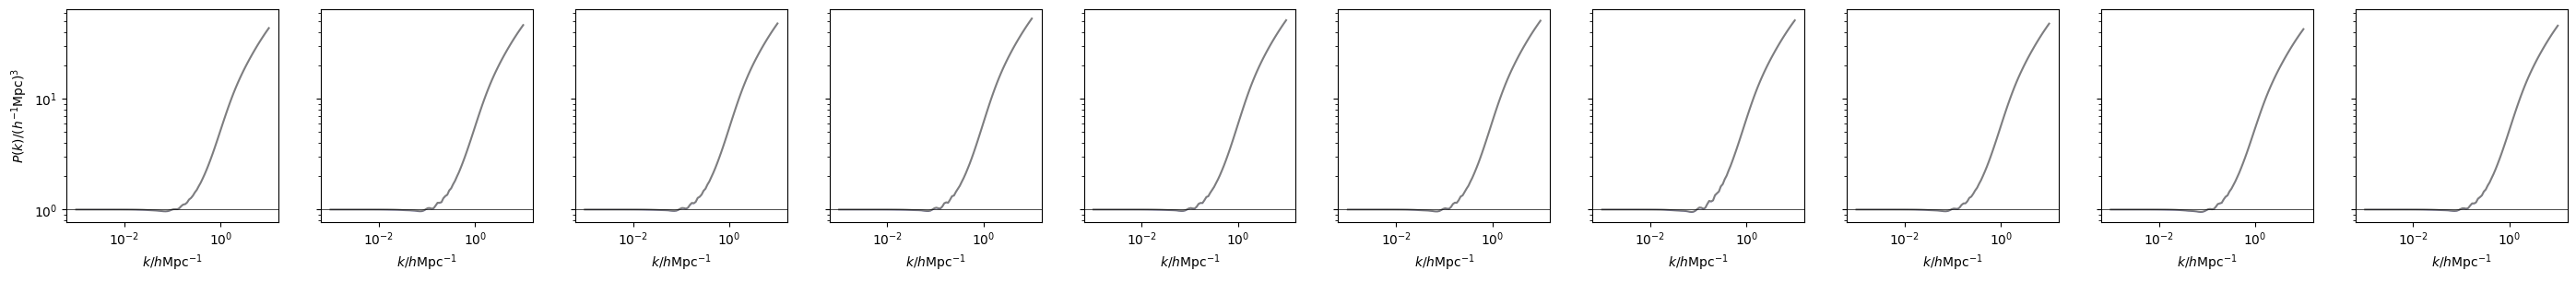

In [337]:
# Plotting parameters
nsig = [1, 2]
alpha_data = 0.5
alpha_model = 0.5
plot_band = True
npow = 10

# Plot power
plt.subplots(1, npow, figsize=(35., 3.), sharex=True, sharey=True)
grid = df_grid.iloc[0].values
for i in range(npow):
    plt.subplot(1, npow, i+1)
    if power_ratio:
        plt.axhline(1., color="black", lw=0.5)
    eval = df_eval[outputs].iloc[i].values
    mean = df_eval_mean.iloc[i].values
    err = df_eval_std.iloc[i].values
    if power_log:
        eval = 10**eval
        mean = 10**mean
        err = 10**err
    plt.plot(grid, eval, color="black", alpha=alpha_data)
    if plot_band:
        for sig in nsig:
            plt.fill_between(grid, mean-sig*err, mean+sig*err, color="blue", lw=0., alpha=alpha_model/sig)
    else:
        plt.plot(grid, mean, color="blue", alpha=0.5)
    plt.xlabel(r"$k/h\mathrm{Mpc}^{-1}$")
    plt.xscale("log")
    if i==0: plt.ylabel(r"$P(k)/(h^{-1}\mathrm{Mpc})^3$")
    plt.yscale("log")
plt.show()

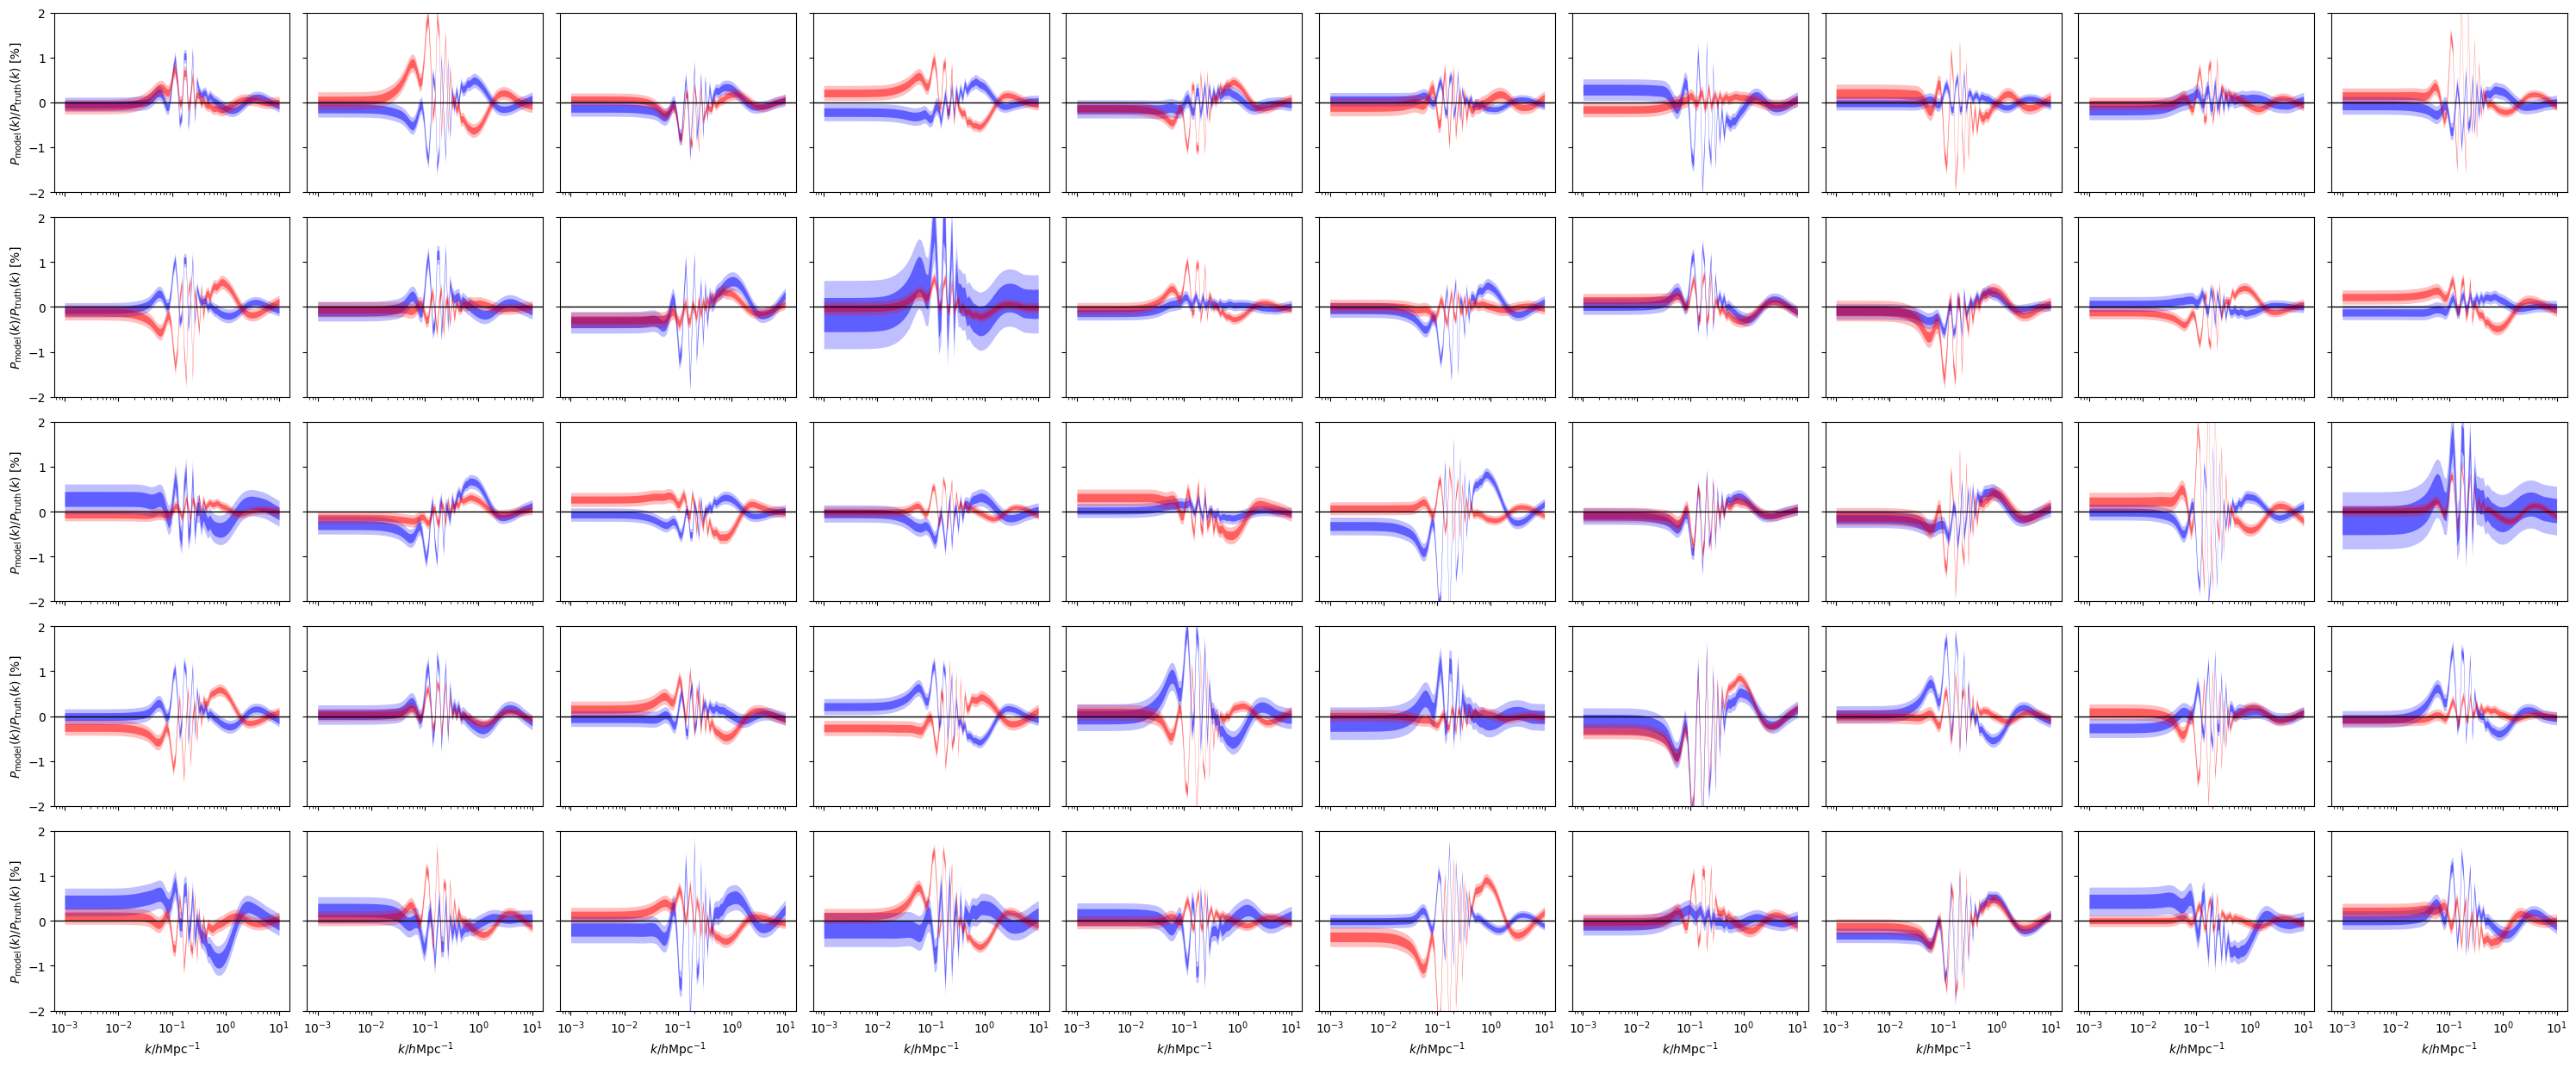

In [340]:
# Parameters
nsig = [1, 2]
alpha_data = 0.5
alpha_model = 0.5
color_model = "blue"
plot_train = True
alpha_train = 0.5
color_train = "red"
dr = 2.
plot_band = True
ncos = 50
nrow = 5

# Calculations
ncol = ncos//nrow

# Plot
grid = df_grid.iloc[0].values
plt.subplots(nrow, ncol, figsize=(30, 2.5*nrow), sharex=True, sharey=True)
for i in range(ncos):
    plt.axhline(0., color="black", lw=1)
    plt.subplot(nrow, ncol, i+1)
    eval = df_eval[outputs].iloc[i].values
    eval_mean = df_eval_mean.iloc[i].values
    eval_err = df_eval_std.iloc[i].values
    train = df_train[outputs].iloc[i].values
    train_mean = df_train_mean.iloc[i].values
    train_err = df_train_std.iloc[i].values
    if power_log:
        eval = 10**eval
        eval_mean = 10**eval_mean
        eval_err = 10**eval_err
        train = 10**train
        train_mean = 10**train_mean
        train_err = 10**train_err
    if plot_band:
        for sig in nsig:
            ymin = 100.*((eval_mean-sig*eval_err)/eval-1.)
            ymax = 100.*((eval_mean+sig*eval_err)/eval-1.)
            plt.fill_between(grid, ymin, ymax, color=color_model, lw=0, alpha=alpha_model/sig)
            if plot_train:
                ymin = 100.*((train_mean-sig*train_err)/train-1.)
                ymax = 100.*((train_mean+sig*train_err)/train-1.)
                plt.fill_between(grid, ymin, ymax, color=color_train, lw=0, alpha=alpha_train/sig)
    else:
        y = 100.*(eval_mean/eval-1.)
        plt.plot(grid, y, color=color_model, alpha=alpha_model)
        if plot_train:
            y = 100.*(train_mean/train - 1.)
            plt.plot(grid, y, color=color_train, alpha=alpha_train)
    if i//ncol==nrow-1: plt.xlabel(r"$k/h\mathrm{Mpc}^{-1}$")
    plt.xscale("log")
    if i%ncol==0: plt.ylabel(r"$P_\mathrm{model}(k)/P_\mathrm{truth}(k)$ [%]")
    plt.ylim(-dr, dr)
plt.tight_layout()
plt.show()

### Delete dataset

Delete an existing dataset with:

In [303]:
# tl.delete_dataset(TRAINING_DATA)

### Delete emulator

Delete a trained emulator with:

In [304]:
# tl.delete_campaign(CAMPAIGN_ID)